In [1]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn
import LogisticRegression as lr

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, roc_auc_score

# A ) 
Here we will load the dataset, then split it into train, validation and test data. 
As the Credit Card data is biased, we also create a downzised dataset.

In [2]:
# Reading in credit card dataset.
x,y = ld.load_data(scaler='minmax')

# Extracting all datapoints where the output is 1 (i.e paying credit card dept).
indices = np.where(y == 1)
indices_zero = np.where(y == 0)
# Randomly extracting equal amount of datapoints where the output is 0 (i.e defaulting).
datapoints = np.random.choice(indices_zero[0], size=y[indices[0]].shape[0], replace=False)

#Stacking the two datasets
x_new = np.vstack((x[indices[0],:],x[datapoints,:]))
y_new = np.vstack((y[indices[0]],y[datapoints]))

# Splitting data in train and test data
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y_new, test_size=0.20, random_state= 0, shuffle=True)
# Splitting in train and validation
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain, test_size=0.125, random_state= 0, shuffle=True)


# Extracting some useful shapes.
nx_train, ny_train = xtrain.shape
nx_test, ny_test = xtest.shape


# B) 
Egen logistic regression med gradient descent.


In [7]:
eta = 0.1 # learning rate
Niter=500
logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
cost_val, cost_train, axis = logreg.fit(xtrain, ytrain, xval, yval, Niter, solver='gd')
classified=logreg.predict(xtest)

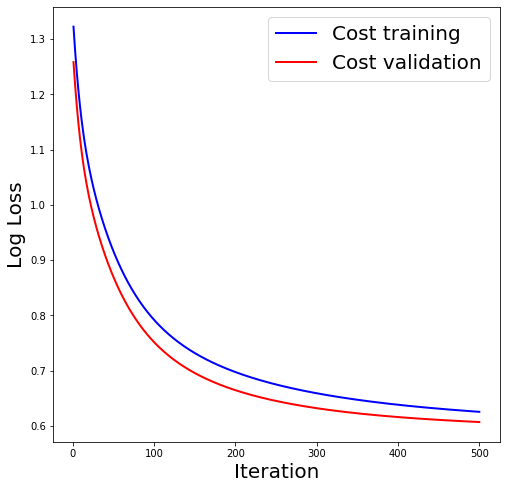

In [8]:

plt.figure(figsize=([8,8]))
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.show()

Normalized confusion matrix
[[0.78981818 0.21018182]
 [0.42578125 0.57421875]]


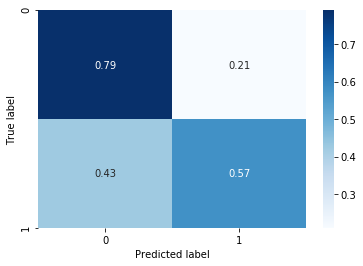

In [10]:
import seaborn as sns
norm = fx.norm_confusion_matrix(ytest, classified, normalize=True)

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()      


# Accuracy. 
Både egen kode og tester med scikit. 

In [13]:
classes = logreg.predict(xtrain)
print(100*np.sum(classes==ytrain)/len(classes),'% Training Accuracy')
print(f1_score(ytrain, classes))

classes = logreg.predict(xval)
print(100*np.sum(classes==yval)/len(classes),'% Validation Accuracy')
print(f1_score(yval, classes))


classes = logreg.predict(xtest)
print(100*np.sum(classes==ytest)/len(classes),'% Test Accuracy')
print(f1_score(ytest, classes))



67.8113898159113 % Training Accuracy
0.6401059220028887
68.59939759036145 % Validation Accuracy
0.6567901234567902
68.58757062146893 % Test Accuracy
0.6380208333333334


# Egen logistisk regresjon med stokastisk gradient descent

In [25]:
%matplotlib qt
import LogisticRegression as lr
Niter=1000
logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
cost_val, cost_train, axis = logreg.fit(xtrain, ytrain, xval, yval, Niter, solver='sgd', batch_size=500)
classified = logreg.predict(xtest)
%matplotlib inline

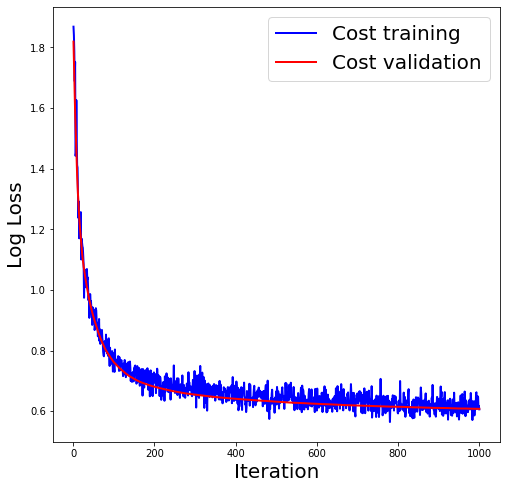

In [26]:
plt.figure(figsize=([8,8]))
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.show()

Normalized confusion matrix
[[0.79781818 0.20218182]
 [0.43828125 0.56171875]]


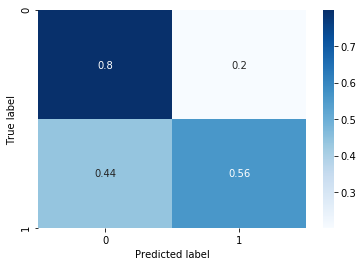

In [27]:
norm = fx.norm_confusion_matrix(ytest, classified, normalize=True)

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()     

In [28]:
classes = logreg.predict(xtrain)
print(100*np.sum(classes==ytrain)/len(classes),'% Training Accuracy')
print(f1_score(ytrain, classes))

classes = logreg.predict(xval)
print(100*np.sum(classes==yval)/len(classes),'% Validation Accuracy')
print(f1_score(yval, classes))


classes = logreg.predict(xtest)
print(100*np.sum(classes==ytest)/len(classes),'% Test Accuracy')
print(f1_score(ytest, classes))



68.44654968242007 % Training Accuracy
0.640147329650092
67.7710843373494 % Validation Accuracy
0.6520325203252033
68.39924670433145 % Test Accuracy
0.6315327184892403


0.7098221590909091
1.0


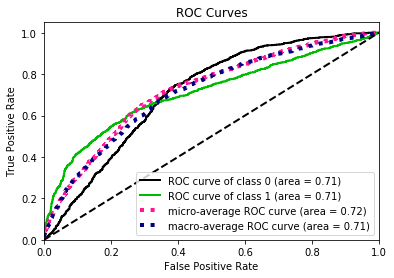

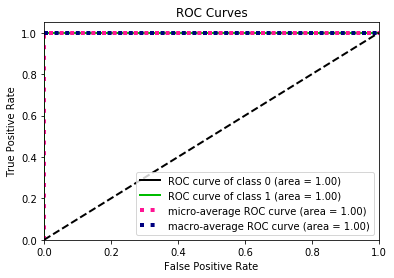

In [309]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

activation =lrf.sigmoid(xtest@beta) 
classes = np.zeros([len(activation)])
classes=np.round(activation)
#skplt.metrics.plot_roc(ytest, classes)


# Plotting AUC with gradient descent 

predictions = xtest@beta
y_probas = lrf.sigmoid(predictions)

y_probas = y_probas.flatten()
y_temp = np.zeros((y_probas.shape[0], 2))
y_temp[:,0] = 1-y_probas
y_temp[:,1] = y_probas 
#y_probas = y_temp



y_temp2 = np.zeros((y_probas.shape[0], 2))
y_temp2[:,0] = (1-ytest).ravel()
y_temp2[:,1] = ytest.ravel() 


ting=roc_auc_score(ytest, y_probas)
ting2=roc_auc_score(ytest, ytest)

print(ting)
print(ting2)

skplt.metrics.plot_roc(ytest, y_temp)
skplt.metrics.plot_roc(ytest, y_temp2)
# ikke surr mer emd det her 

In [205]:
def bestCurve(y):
    defaults = sum(y == 1)
    total = len(y)
    x = np.linspace(0, 1, total)
    y1 = np.linspace(0, 1, defaults)
    y2 = np.ones(total-defaults)
    y3 = np.concatenate([y1,y2])
    return x, y3


In [310]:

model = LogisticRegression()
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytrain, predicted_classes)

print(accuracy, '% Training Accuracy')

predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytest, predicted_classes)

print(accuracy, '% Test Accuracy')

70.6103993971364 % Training Accuracy
70.24482109227873 % Test Accuracy


C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# C) 
Neural Network. 

In [315]:

epochs=100
batch_size=100
n_features=x.shape[1]
etavec = np.logspace(-2, -1, 2)
lmbvec = np.logspace(-7, -6, 2)
lmbvec[0]=0

activation = [lrf.relu, lrf.relu, lrf.relu, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.relu_deriv, lrf.relu_deriv, lrf.sigmoid_deriv]

saved_net = np.zeros((len(etavec), len(lmbvec)), dtype=object)
train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        neural_net = nn.ANN(lmb=lmb, bias=0, eta=etas,early_stop_tol = 10e-03,\
                            early_stop_nochange=1000, mode = 'classification')            
        neural_net.add_layers(n_features=[91,50,50,20], n_neurons = [50,50,20,1] , n_layers=4)
        
        neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                         ,xval,yval, verbose=True)

        pred = neural_net.feed_out(xval, activation)
        train_accuracy[i,j] =  lrf.cost_log_ols(pred,yval.T)
        print('training mse for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', train_accuracy [i,j])


Epoch 1 loss 0.6972824545093254
Epoch 2 loss 0.696300325342116
Epoch 3 loss 0.6961753019553442
Epoch 4 loss 0.6959917197886332
Epoch 5 loss 0.6976655234323111
Epoch 6 loss 0.6969321540130705
Epoch 7 loss 0.6973984671811859
Epoch 8 loss 0.6971214663117832
Epoch 9 loss 0.6970018578659806
Epoch 10 loss 0.697693769416572
Epoch 11 loss 0.6969766561278572
Epoch 12 loss 0.6968202144066916
Epoch 13 loss 0.6965583953125598
Epoch 14 loss 0.6966112761978289
Epoch 15 loss 0.696708277335881
Epoch 16 loss 0.6966576727040451
Epoch 17 loss 0.6963860925659238
Epoch 18 loss 0.6965683498894268
Epoch 19 loss 0.6963630956529181
Epoch 20 loss 0.69656761714641
Epoch 21 loss 0.6969424127494572
Epoch 22 loss 0.6966277079232724
Epoch 23 loss 0.6962167729766042
Epoch 24 loss 0.6961703153473232
Epoch 25 loss 0.6962036944337553
Epoch 26 loss 0.6959957903778748
Epoch 27 loss 0.6958981007806039
Epoch 28 loss 0.6961591479815681
Epoch 29 loss 0.6960555464085846
Epoch 30 loss 0.6955290740856653
Epoch 31 loss 0.69589622

Epoch 48 loss 0.6312488773020889
Epoch 49 loss 0.6289240996043391
Epoch 50 loss 0.6324791305373554
Epoch 51 loss 0.6386324194209827
Epoch 52 loss 0.6322709998378866
Epoch 53 loss 0.6309848154047059
Epoch 54 loss 0.6327461767247295
Epoch 55 loss 0.6291821323890101
Epoch 56 loss 0.6272453954022693
Epoch 57 loss 0.6321193449757744
Epoch 58 loss 0.6328697490301232
Epoch 59 loss 0.6308573380732061
Epoch 60 loss 0.6329061017947809
Epoch 61 loss 0.6291398627286425
Epoch 62 loss 0.629145123761697
Epoch 63 loss 0.6292801082368773
Epoch 64 loss 0.6270885704875533
Epoch 65 loss 0.6267803474619218
Epoch 66 loss 0.6320824390015521
Epoch 67 loss 0.6306493167585746
Epoch 68 loss 0.6286703597335841
Epoch 69 loss 0.6296279670892928
Epoch 70 loss 0.6287221435209783
Epoch 71 loss 0.6308286261716801
Epoch 72 loss 0.6294416996524068
Epoch 73 loss 0.6294518040167215
Epoch 74 loss 0.6292533408954236
Epoch 75 loss 0.6309152495964783
Epoch 76 loss 0.6282864347916746
Epoch 77 loss 0.6305581260062514
Epoch 78 lo

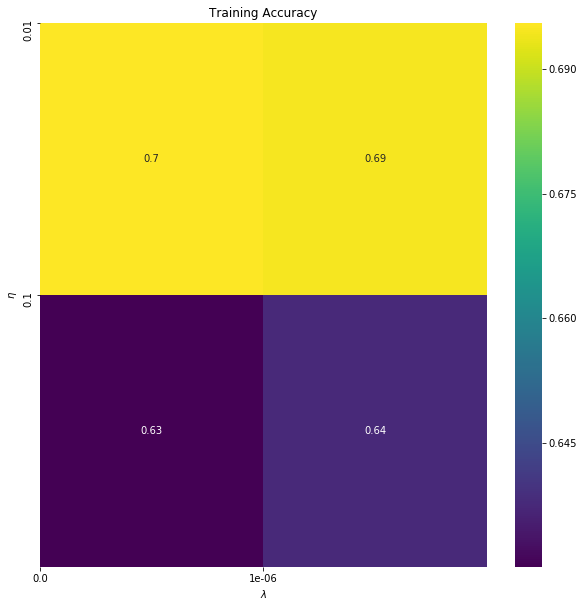

In [316]:
import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_yticks(range(len(etavec)))
ax.set_xticks(range(len(lmbvec)))
plt.show()

In [317]:
best_eta_index, best_lmb_index = np.where(train_accuracy == np.min(train_accuracy))
best_eta,best_lmb = etavec[best_eta_index], lmbvec[best_lmb_index] 

In [318]:
#np.random.seed(2019)
epochs=100
batch_size=100
activation = [lrf.relu, lrf.relu, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.relu_deriv, lrf.sigmoid_deriv]

#neural_net = nn.ANN(lmb=best_lmb, bias=0.5, eta= best_eta, mode = 'classification')            
neural_net = nn.ANN(lmb=0, bias=0.5, eta= 0.1,early_stop_tol = 10e-04,\
                            early_stop_nochange=100, mode = 'classification')            
neural_net.add_layers(n_features=[xtrain.shape[1],50,20], n_neurons = [50,20,1] , n_layers=3)
        
neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative ,xtrain,ytrain, verbose=True)




Epoch 1 loss 0.8036569406641815
Epoch 2 loss 0.8045976388188568
Epoch 3 loss 0.8050294590864303
Epoch 4 loss 0.806225778276001
Epoch 5 loss 0.8047520500998446
Epoch 6 loss 0.8051669169488515
Epoch 7 loss 0.8042018780114216
Epoch 8 loss 0.8035179093490451
Epoch 9 loss 0.8034266733410211
Epoch 10 loss 0.8034223193216924
Epoch 11 loss 0.8032390715431965
Epoch 12 loss 0.8030399023788255
Epoch 13 loss 0.8021890846376593
Epoch 14 loss 0.8013481200926675
Epoch 15 loss 0.7846254198332281
Epoch 16 loss 0.7389689857088539
Epoch 17 loss 0.7030871333720802
Epoch 18 loss 0.6901002713545197
Epoch 19 loss 0.7018531736715896
Epoch 20 loss 0.6921710934266234
Epoch 21 loss 0.6730759372651601
Epoch 22 loss 0.6634999238104625
Epoch 23 loss 0.6707153453506485
Epoch 24 loss 0.6590589661439927
Epoch 25 loss 0.6548009136453316
Epoch 26 loss 0.6511357136037702
Epoch 27 loss 0.6535520929861114
Epoch 28 loss 0.6541087855412647
Epoch 29 loss 0.6524617556899737
Epoch 30 loss 0.6485435104884901
Epoch 31 loss 0.6569

In [319]:
activ=neural_net.feed_out(xtest, activation)
print(activ)
print(ytest)
classes=np.round(activ)
print(classes)

print(100*np.sum(classes==ytest)/len(activ),'% Test Accuracy')
print(f1_score(ytest, classes)) 

cm = confusion_matrix(ytest , classes)
print(cm)


[[1.  ]
 [0.01]
 [0.01]
 ...
 [1.  ]
 [1.  ]
 [0.01]]
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
68.7382297551789 % Test Accuracy
0.6628757108042241
[[1009  366]
 [ 464  816]]


In [320]:
activ=neural_net.feed_out(xtrain, activation)

classes=np.round(activ)

print(100*np.sum(classes==ytrain)/len(activ),'% training Accuracy')
print(f1_score(ytrain, classes)) 

cm = confusion_matrix(ytrain , classes)
print(cm)


67.9836365593713 % training Accuracy
0.6666666666666665
[[3341 1269]
 [1705 2974]]


In [321]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=2000, alpha=0,
                    solver='sgd', verbose=10, tol=1e-4,batch_size=200, random_state=1,
                    learning_rate_init=.1)

mlp.fit(xtrain, ytrain.ravel())
print("Training set score: %f" % mlp.score(xtrain, ytrain))
#print("Test set score: %f" % mlp.score(xtest, ytest))



Iteration 1, loss = 0.60419995
Iteration 2, loss = 0.57846050
Iteration 3, loss = 0.57522795
Iteration 4, loss = 0.57319483
Iteration 5, loss = 0.57110188
Iteration 6, loss = 0.56940529
Iteration 7, loss = 0.56738562
Iteration 8, loss = 0.56566384
Iteration 9, loss = 0.56580159
Iteration 10, loss = 0.56372636
Iteration 11, loss = 0.56258714
Iteration 12, loss = 0.56084052
Iteration 13, loss = 0.56131437
Iteration 14, loss = 0.55967534
Iteration 15, loss = 0.55823837
Iteration 16, loss = 0.55754820
Iteration 17, loss = 0.55602905
Iteration 18, loss = 0.55517526
Iteration 19, loss = 0.55365133
Iteration 20, loss = 0.55276807
Iteration 21, loss = 0.55117464
Iteration 22, loss = 0.55142575
Iteration 23, loss = 0.54879496
Iteration 24, loss = 0.54813331
Iteration 25, loss = 0.54819379
Iteration 26, loss = 0.54550572
Iteration 27, loss = 0.54438368
Iteration 28, loss = 0.54593561
Iteration 29, loss = 0.54262811
Iteration 30, loss = 0.54390033
Iteration 31, loss = 0.54199761
Iteration 32, los

Iteration 254, loss = 0.42127350
Iteration 255, loss = 0.42061701
Iteration 256, loss = 0.42338420
Iteration 257, loss = 0.41810728
Iteration 258, loss = 0.41808932
Iteration 259, loss = 0.41481027
Iteration 260, loss = 0.41554296
Iteration 261, loss = 0.41382893
Iteration 262, loss = 0.41429402
Iteration 263, loss = 0.41495860
Iteration 264, loss = 0.41747939
Iteration 265, loss = 0.41701700
Iteration 266, loss = 0.41561118
Iteration 267, loss = 0.41030905
Iteration 268, loss = 0.42028344
Iteration 269, loss = 0.42335184
Iteration 270, loss = 0.41551621
Iteration 271, loss = 0.41503309
Iteration 272, loss = 0.41263385
Iteration 273, loss = 0.41200183
Iteration 274, loss = 0.41484734
Iteration 275, loss = 0.41195254
Iteration 276, loss = 0.41442275
Iteration 277, loss = 0.41531391
Iteration 278, loss = 0.41142660
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.800409


In [322]:
pred = mlp.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)
print(f1_score(ytest, pred)) 

cm = confusion_matrix(ytest , pred)
print(cm)

68.7005649717514
0.641346568839016
[[1081  294]
 [ 537  743]]


In [323]:
pred = mlp.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)

cm = confusion_matrix(ytrain , pred)
print(cm)

80.04090860157174
[[4143  467]
 [1387 3292]]


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

xtrain,ytrain = load_breast_cancer(return_X_y=True)
scaler = MinMaxScaler()
indx = np.arange(xtrain.shape[1])
scaler.fit(xtrain[:,indx])
xtrain = scaler.transform(xtrain[:,indx])
ytrain=ytrain.reshape([len(ytrain),1])